In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv("HeartDisease.csv")
df.sample(5)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the info above all the features numeric with zero null observations

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Interpretations:

**Age:** 

* The average age in the dataset is around 54.4 years old. The youngest patient was 29 years old, and the oldest was 77. There seems to be a wider spread of ages with a standard deviation of 9.1 years.

**Gender:**  

* The distribution is slightly skewed towards males (mean = 0.68) with a value of 1 representing male and 0 representing female.

**Chest Pain:**  

* The data uses a coding system for chest pain types (0 to 3). The average value (0.97) suggests a prevalence of the middle category (code 1) compared to none (code 0) or the most severe pain (code 3).

**Resting Blood Pressure (rest_bps):**
  
* The average resting blood pressure is slightly elevated at 131.6 mmHg. We can see a wider spread in the data with a standard deviation of 17.5 mmHg.

**Cholesterol:** 

* The average cholesterol level is 246.3 mg/dL, which is on the higher side considering healthy ranges. There's a standard deviation of 51.8, indicating variability in cholesterol levels.
* Based on the descriptive statistics you provided, here's an interpretation of the remaining features in the heart disease data:

**fasting_blood_sugar:**

* The average value (0.15) suggests that most patients likely have normal fasting blood sugar levels (generally below 100 mg/dL). 
* The standard deviation (0.36) indicates some variability in blood sugar levels.

**rest_ecg:**

* The coding system for this feature likely represents different levels of potassium levels based on resting ECG (electrocardiogram). The average value (0.53) suggests a distribution around the middle category (code 1) if a 3-level system is used (0, 1, 2).

**thalach (maximum heart rate):**

* The average maximum heart rate is around 149.6 bpm. There's a wider spread in the data with a standard deviation of 22.9 bpm.

**exer_angina:**

* The average value (0.33) suggests that slightly less than a third of patients (33%) experience exercise-induced angina (chest pain).

**old_peak:**

* This feature refers to ST depression induced by exercise relative to rest. The average value (1.04) and standard deviation (1.16) indicate some variability in ST depression levels.

**slope:**

* The coding likely represents the slope of the peak exercise ST segment on ECG. The average value (1.40) suggests a prevalence of the middle category (code 1) in this 3-level coding system (assuming 0, 1, 2).

**ca (number of major vessels):**

* The average number of major vessels with narrowing is around 0.73. The minimum and maximum values (0 and 4) suggest the dataset includes patients with no narrowing to those with narrowing in all major vessels.

**thalassemia:**

* This feature likely represents a coding system for different severities of thalassemia (a blood disorder). The average value (2.31) suggests a prevalence of the highest category (code 3) in this potential 3-level coding system (assuming 0, 1, 2, 3).

**target:**

* This is the target variable indicating the presence or absence of heart disease. The average value (0.54) suggests that roughly half the patients in the dataset have heart disease (coded as 1).


## Plotting

In [23]:
df.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [35]:
cat_cols = [
    "gender",
    "chest_pain",
    "fasting_blood_sugar",
    "rest_ecg",
    "exer_angina",
    "slope",
    "ca",
    "thalassemia",
]

num_cols = ["age", "rest_bps", "cholestrol", "thalach", "exer_angina", "old_peak"]

In [39]:
df_cats = df[cat_cols]
df_nums = df[num_cols]

In [50]:
gender_map = {0: "Male", 1: "Female"}
yn_map = {1: "Yes", 0: "No"}

df_cats.loc[:, "gender_map"] = df_cats["gender"].map(gender_map)
df_cats.loc[:, "exer_angina_map"] = df_cats["exer_angina"].map(yn_map)
df_cats.loc[:, "target_map"] = df["target"].map(yn_map)

df_cats.head(5)

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia,gender_map,exer_angina_map,target_map
0,1,3,1,0,0,0,0,1,Female,No,Yes
1,1,2,0,1,0,0,0,2,Female,No,Yes
2,0,1,0,0,0,2,0,2,Male,No,Yes
3,1,1,0,1,0,2,0,2,Female,No,Yes
4,0,0,0,1,1,2,0,2,Male,Yes,Yes


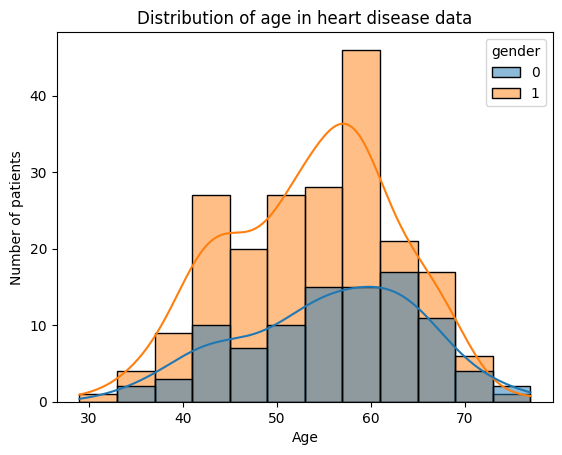

In [16]:
sns.histplot(df, x="age", hue="gender", kde=True)
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Distribution of age in heart disease data")
plt.show()

### The distribution is positively skewed, meaning there are more younger patients than older patients. The most frequent age group is between 50 and 60 years old. There are fewer patients  in the younger and older age groups.

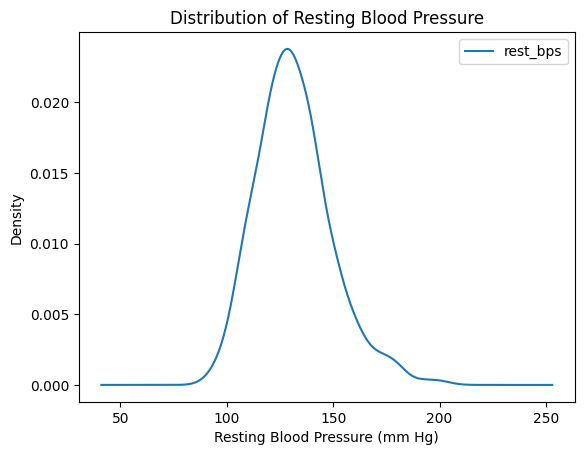

In [17]:
df[["rest_bps"]].plot(kind="kde")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.title("Distribution of Resting Blood Pressure")
plt.show()

### The distribution of resting blood pressure is skewed towards the right, meaning there are more people with higher resting blood pressure than those with lower resting blood pressure in this dataset.
### The peak density is around 130-140 mmHg, which suggests that this is the most common range of resting blood pressure in this dataset.

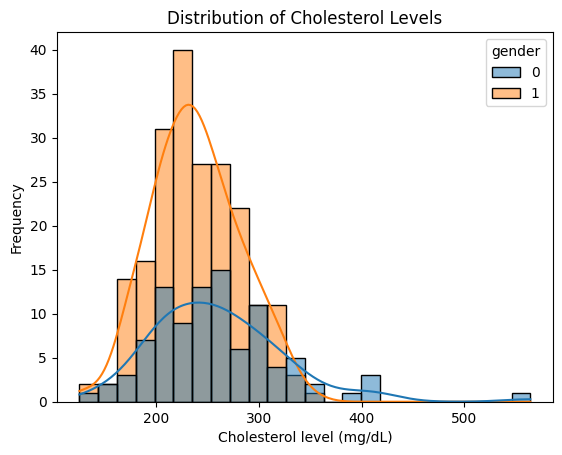

In [18]:
sns.histplot(df, x="cholestrol", hue="gender", color="dodgerblue", kde=True)
plt.xlabel("Cholesterol level (mg/dL)")
plt.ylabel("Frequency")
plt.title("Distribution of Cholesterol Levels")
plt.show()

### Overall Cholesterol Distribution: The distribution of cholesterol levels is skewed to the right, indicating more people in the dataset have higher cholesterol levels than lower cholesterol levels.
### Gender Comparison: The distributions for males (blue) and females (orange) appear to be largely similar. There might be a slight shift, with the peak density for females potentially at a higher cholesterol level compared to males. 

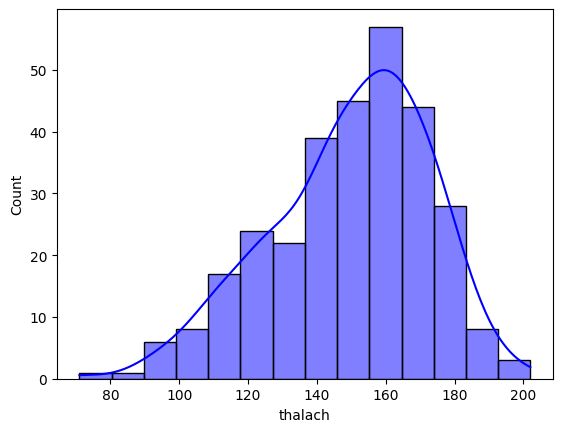

In [146]:
sns.histplot(df["thalach"], color="blue", kde=True)
plt.savefig('images/eda_output/output_thalach.png')
plt.show()

### The distribution is skewed to the right. There's a higher density of patients with lower maximum heart rates compared to those with very high rates.
### The peak density is around 130-140 bpm, suggesting this is the most common range of maximum heart rate in this dataset.

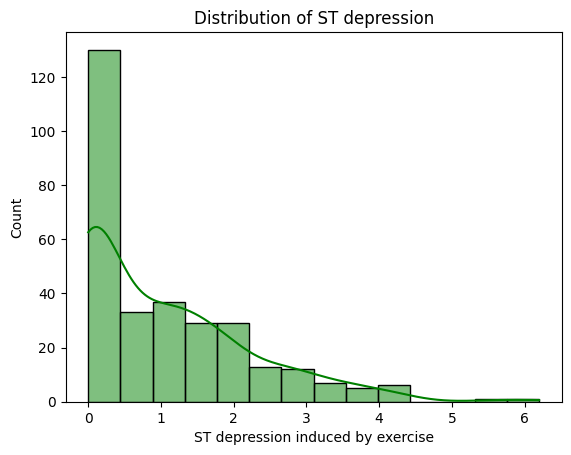

In [20]:
sns.histplot(data=df, x="old_peak", color="green", kde=True)
plt.xlabel("ST depression induced by exercise")
plt.title("Distribution of ST depression")
plt.show()

### The distribution is skewed to the right, indicating that there are more patients with lower values of ST depression (less depression) compared to those with higher values (more depression) in this dataset.
### The peak density is around 1.0 to 1.5, suggesting that this is the most common range of ST depression observed in the data.

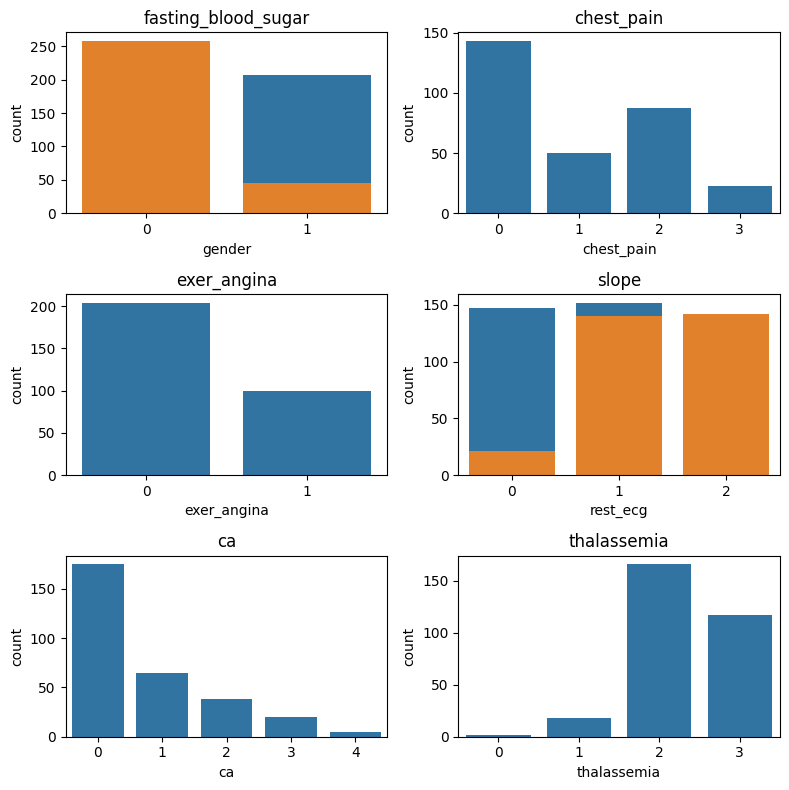

In [136]:
cat_cols = [
    "gender",
    "chest_pain",
    "fasting_blood_sugar",
    "rest_ecg",
    "exer_angina",
    "slope",
    "ca",
    "thalassemia",
]
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Count plot for each feature on a separate subplot
for i, feature in enumerate(cat_cols):
    row = i // 3  # Integer division for row index
    col = i % 2  # Modulo for column index
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(feature)  # Set subplot title

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('images/eda_output/output_catcols.png')
plt.show()

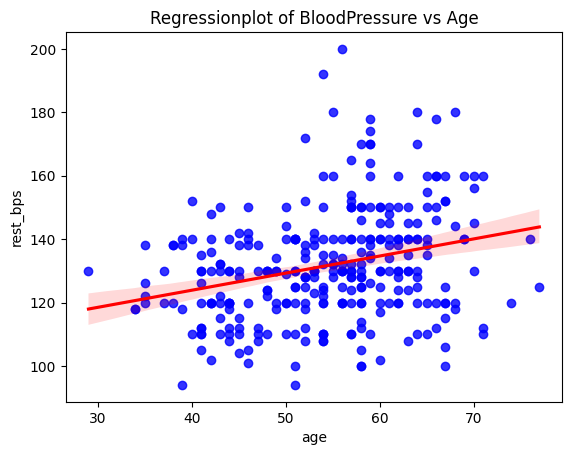

In [137]:
# Investigating if blood pressure varies with age
sns.regplot(
    x="age",
    y="rest_bps",
    data=df,
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Regressionplot of BloodPressure vs Age")
plt.savefig('images/eda_output/rest_bpsvsage.png')
plt.show()

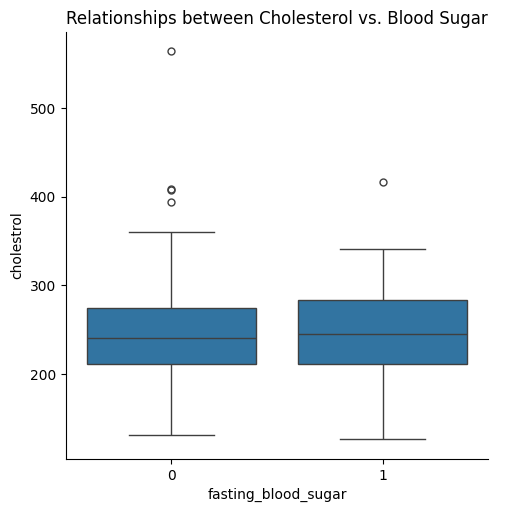

In [138]:
#  Explore potential relationships between Cholesterol vs. Blood Sugar

sns.catplot(x="fasting_blood_sugar", y="cholestrol", data=df, kind="box")
plt.title("Relationships between Cholesterol vs. Blood Sugar")
plt.savefig('images/eda_output/output_fastingvschol.png')
plt.show()

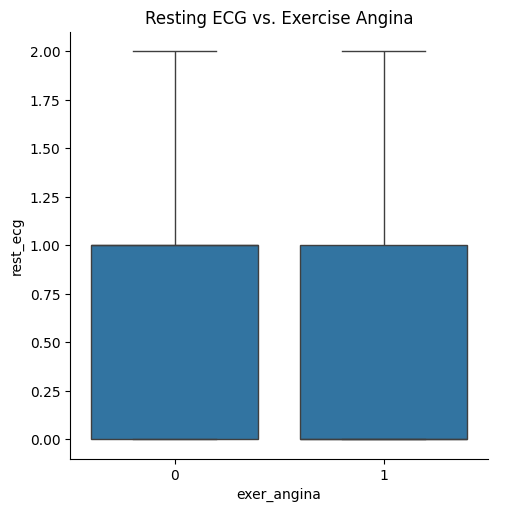

In [139]:
# Resting ECG vs. Exercise Angina
sns.catplot(y="rest_ecg", x="exer_angina", data=df, kind="box")
plt.title("Resting ECG vs. Exercise Angina")
plt.savefig('images/eda_output/output_ecgvsangina.png')
plt.show()

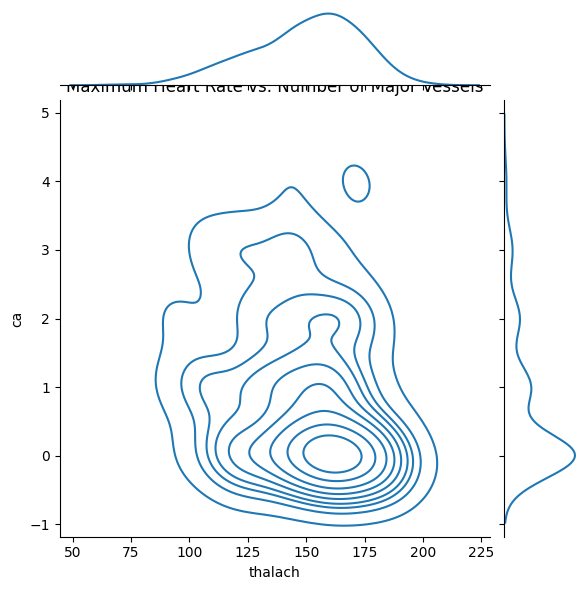

In [140]:
sns.jointplot(x="thalach", y="ca", data=df, kind="kde")
plt.title("Maximum Heart Rate vs. Number of Major Vessels")
plt.savefig('images/eda_output/output_thalachvsca.png')
plt.show()

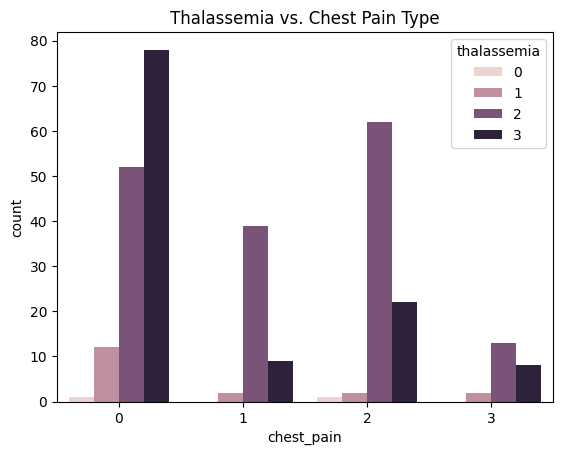

In [141]:
sns.countplot(x="chest_pain", hue="thalassemia", data=df)
plt.title("Thalassemia vs. Chest Pain Type")
plt.savefig('images/eda_output/output_thalassemiavschetpain.png')
plt.show()

C:\Users\Abdurrahman\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


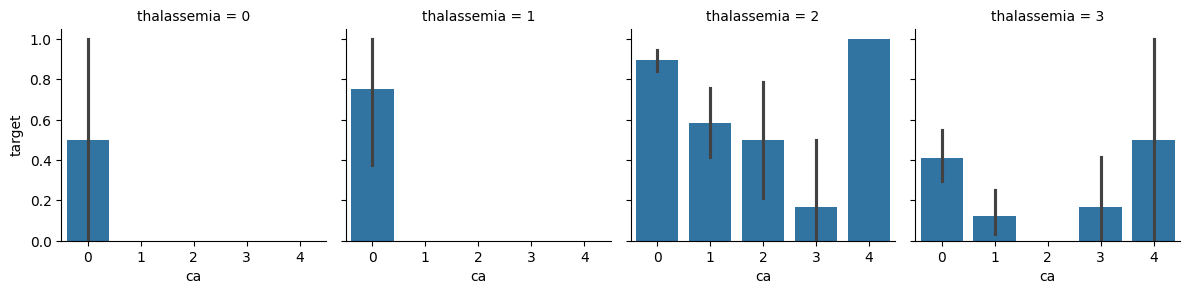

In [142]:
g = sns.FacetGrid(df, col="thalassemia")
g.map(sns.barplot, "ca", "target")  # Barplot for target variable
plt.subplots_adjust(top=0.9)  # Adjust spacing to avoid overlapping titles
plt.savefig('images/eda_output/output_thalassemiavscavstar.png')
plt.show()

C:\Users\Abdurrahman\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


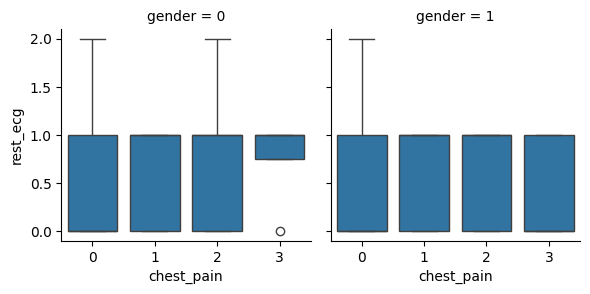

In [143]:
g = sns.FacetGrid(df, col='gender')
g.map(sns.boxplot, 'chest_pain', 'rest_ecg')
plt.subplots_adjust(top=0.9)  # Adjust spacing to avoid overlapping titles
plt.savefig('images/eda_output/output_chestvsecgvsgender.png')
plt.show()


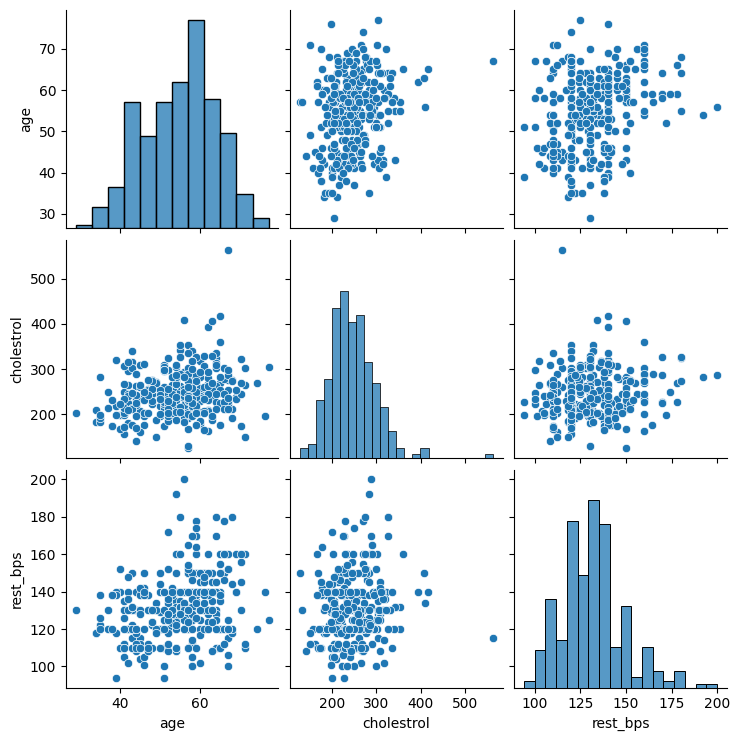

In [145]:
sns.pairplot(df, vars=['age', 'cholestrol', 'rest_bps'])
plt.savefig('images/eda_output/output_agevschvsbps.png')
plt.show()
